In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib as mpl
from glob import glob

In [2]:
#plt.rc("font", family="Malgun Gothic")
plt.rc("font", family="D2Coding")
plt.rc("axes", unicode_minus=False)

In [3]:
file_list = glob("./data/bike/*")
print(len(file_list), file_list, sep="\n")

3
['./data/bike\\sampleSubmission.csv', './data/bike\\test.csv', './data/bike\\train.csv']


In [4]:
train = pd.read_csv(file_list[2], parse_dates=["datetime"])
train.shape

(10886, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
sns.set(font_scale=0.9)

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

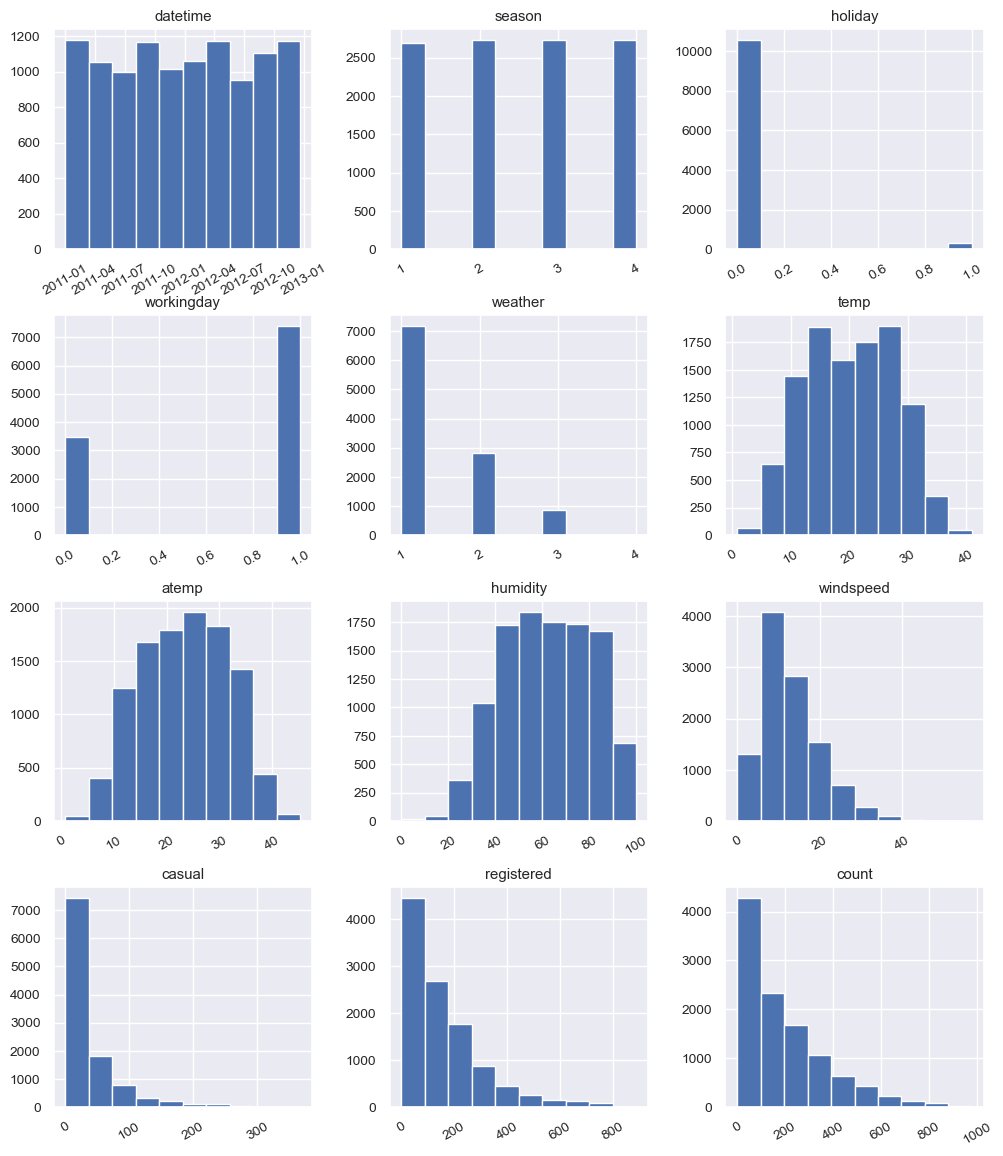

In [8]:
train.hist(figsize=(12, 14), xrot=30)

In [9]:
train["temp"].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [10]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
train["datetime"].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [12]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour

In [13]:
train[["datetime", "year", "month", "day", "hour"]].tail()

,datetime,year,month,day,hour
10881,2012-12-19 19:00:00,2012,12,19,19
10882,2012-12-19 20:00:00,2012,12,19,20
10883,2012-12-19 21:00:00,2012,12,19,21
10884,2012-12-19 22:00:00,2012,12,19,22
10885,2012-12-19 23:00:00,2012,12,19,23


[Text(0.5, 1.0, '시간별 대여량')]

c:\Users\yarim\anaconda3\envs\system_trading_py39_64\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\yarim\anaconda3\envs\system_trading_py39_64\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
c:\Users\yarim\anaconda3\envs\system_trading_py39_64\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\yarim\anaconda3\envs\system_trading_py39_64\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
c:\Users\yarim\anaconda3\envs\system_trading_py39_64\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwa

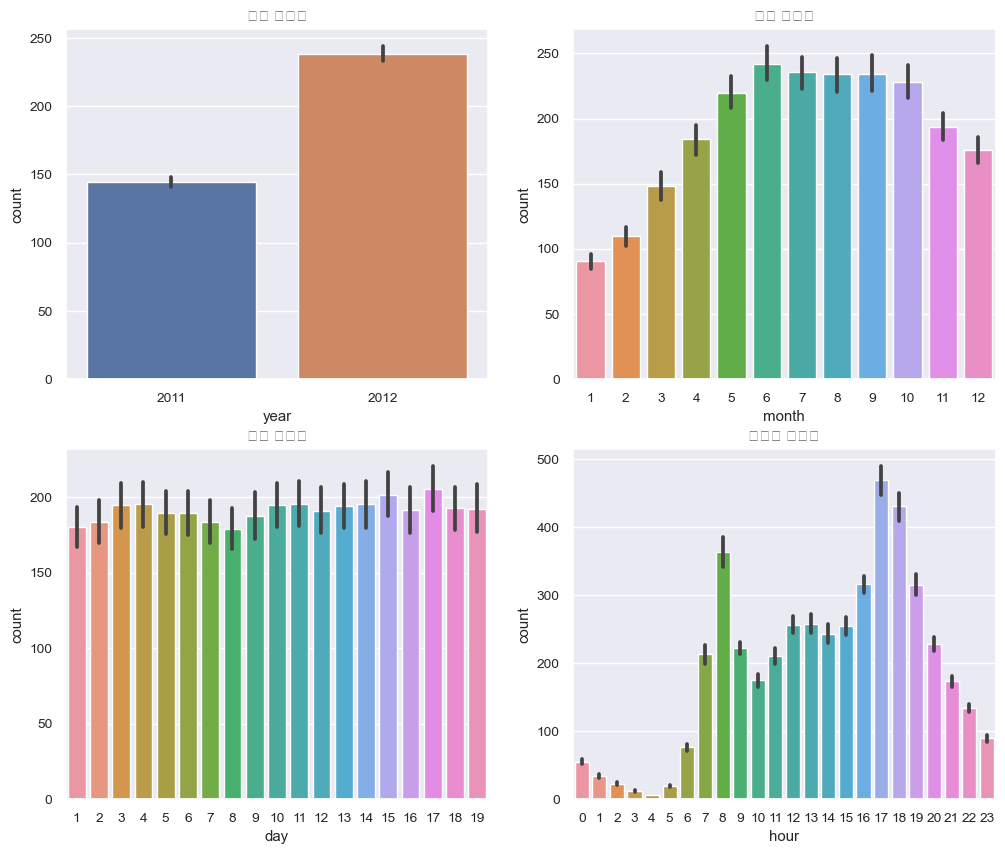

In [14]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
figure.set_size_inches(12, 10)

sns.barplot(train, 
            x="year", 
            y="count", 
            ax=ax1)
sns.barplot(train, 
            x="month", 
            y="count", 
            ax=ax2)
sns.barplot(train, 
            x="day", 
            y="count", 
            ax=ax3)
sns.barplot(train, 
            x="hour", 
            y="count", 
            ax=ax4)

ax1.set(title="연별 대여량")
ax2.set(title="월별 대여량")
ax3.set(title="일별 대여량")
ax4.set(title="시간별 대여량")

In [15]:
train["count"].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

[Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

c:\Users\yarim\anaconda3\envs\system_trading_py39_64\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\yarim\anaconda3\envs\system_trading_py39_64\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
c:\Users\yarim\anaconda3\envs\system_trading_py39_64\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
c:\Users\yarim\anaconda3\envs\system_trading_py39_64\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
c:\Users\yarim\anaconda3\envs\system_trading_py39_64\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from current font.
  func(*args, **kwarg

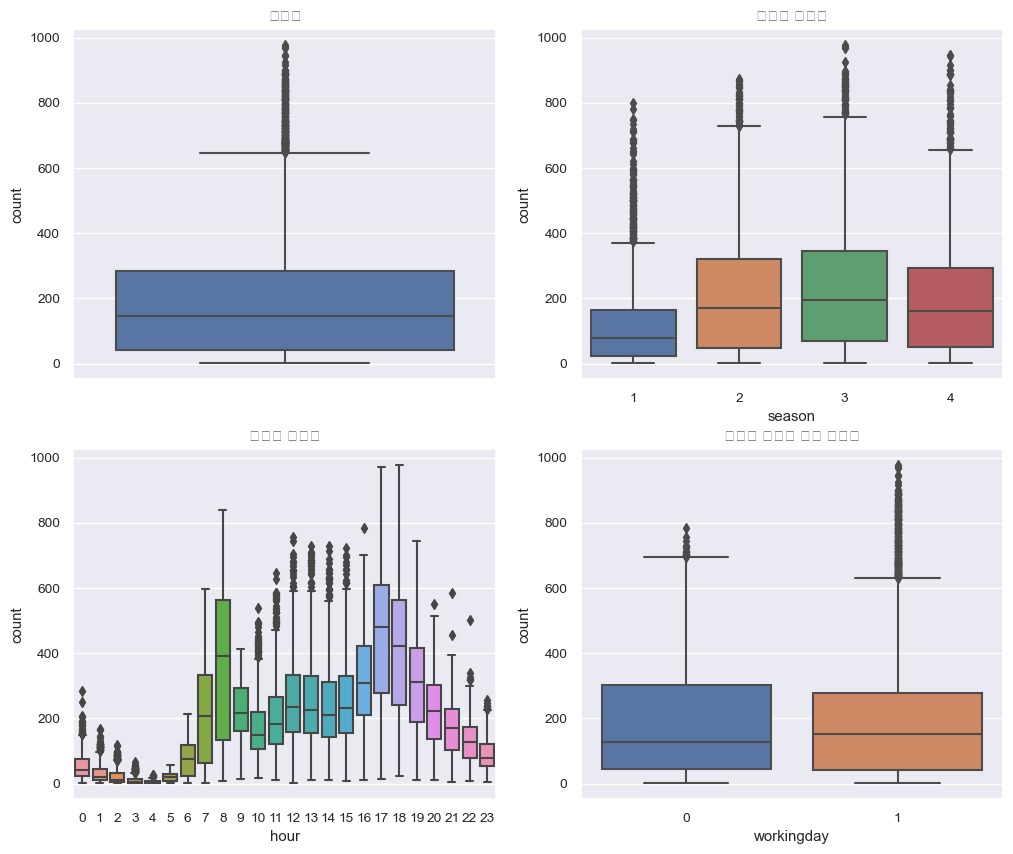

In [16]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(12, 10)

sns.boxplot(train, 
            y="count",
            ax=axes[0][0])
sns.boxplot(train, 
            x="season",
            y="count",
            ax=axes[0][1])
sns.boxplot(train, 
            x="hour",
            y="count",
            ax=axes[1][0])
sns.boxplot(train,
            x="workingday",
            y="count",
            ax=axes[1][1])

axes[0][0].set(title="대여량")
axes[0][1].set(title="계절별 대여량")
axes[1][0].set(title="시간별 대여량")
axes[1][1].set(title="근무일 여부에 따른 대여량")

In [17]:
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 17)

In [18]:
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<Axes: xlabel='hour', ylabel='count'>

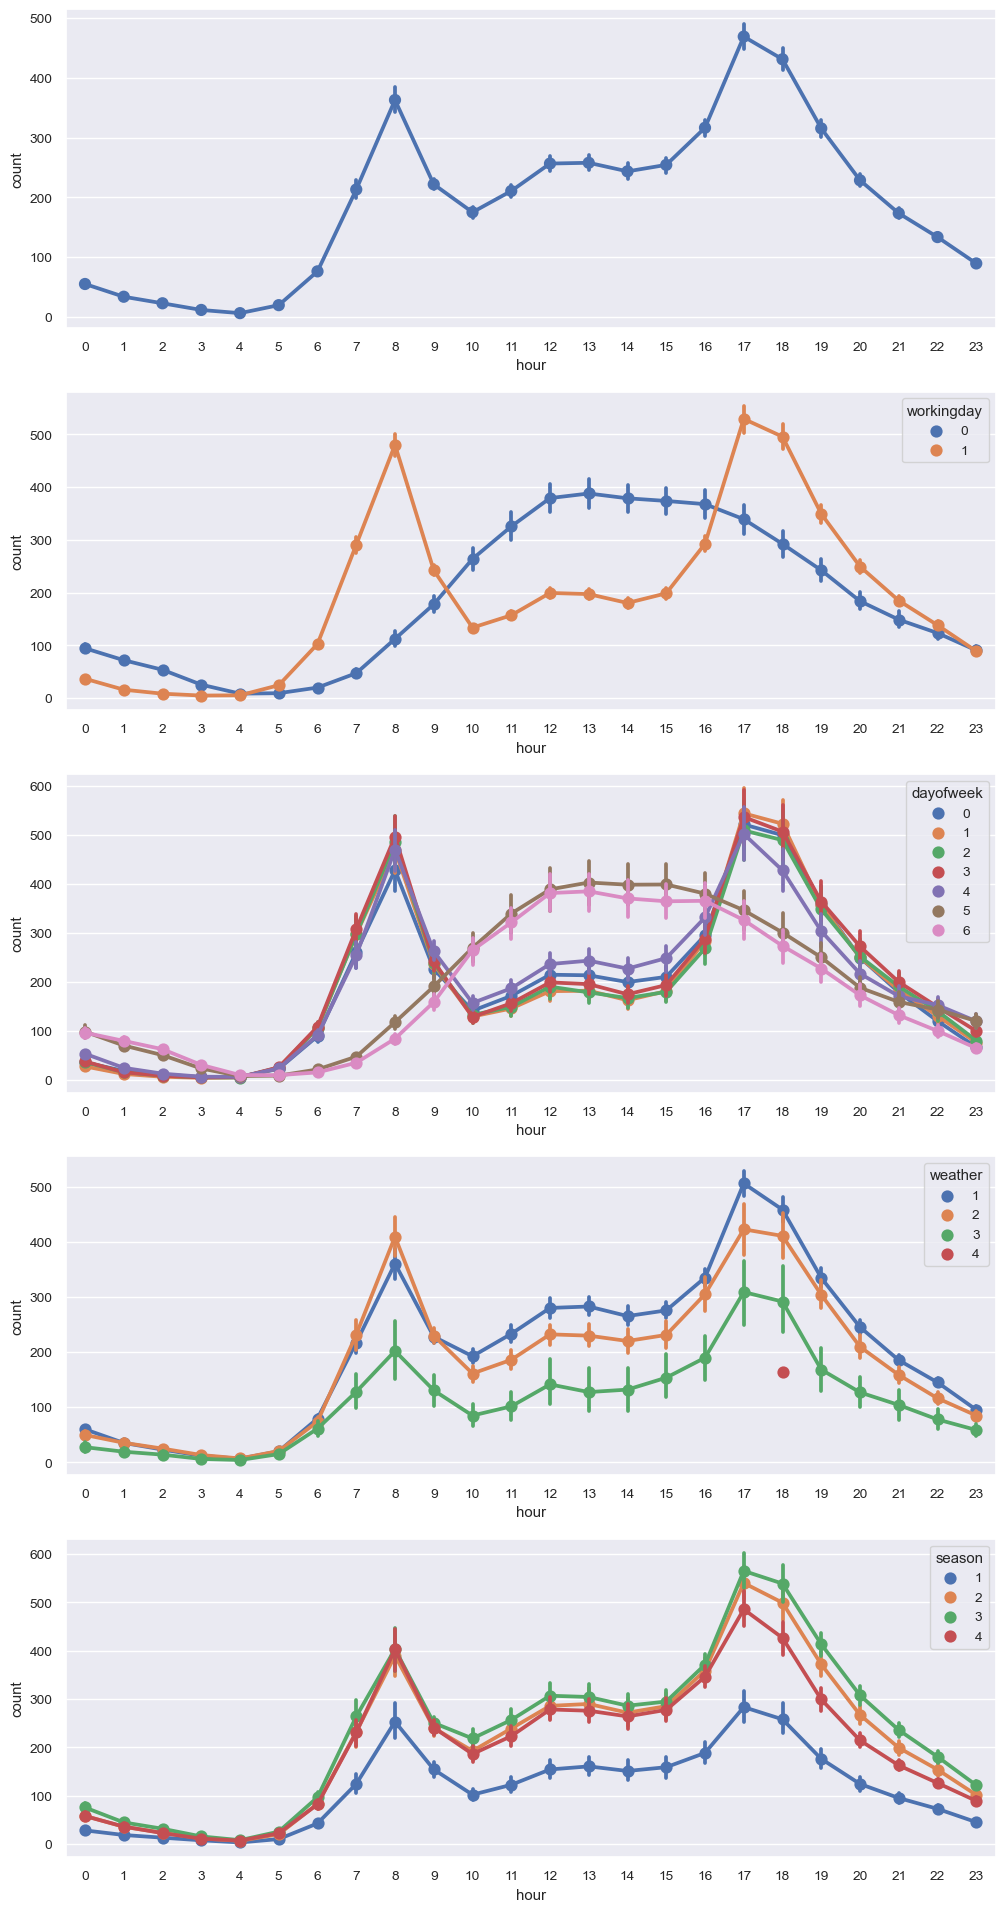

In [19]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)
fig.set_size_inches(12, 24)

sns.pointplot(train,
              x="hour",
              y="count",
              ax=ax1)
sns.pointplot(train,
              x="hour",
              y="count",
              hue="workingday",
              ax=ax2)
sns.pointplot(train,
              x="hour",
              y="count",
              hue="dayofweek",
              ax=ax3)
sns.pointplot(train,
              x="hour",
              y="count",
              hue="weather",
              ax=ax4)
sns.pointplot(train,
              x="hour",
              y="count",
              hue="season",
              ax=ax5)

In [20]:
corr_matrix_df = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corr_matrix_df = corr_matrix_df.corr()
corr_matrix_df

,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.984948,0.467097,0.318571,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,0.462067,0.314635,-0.043536,-0.057473,0.389784
casual,0.467097,0.462067,1.000000,0.497250,-0.348187,0.092276,0.690414
registered,0.318571,0.314635,0.497250,1.000000,-0.265458,0.091052,0.970948
humidity,-0.064949,-0.043536,-0.348187,-0.265458,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,0.092276,0.091052,-0.318607,1.000000,0.101369
count,0.394454,0.389784,0.690414,0.970948,-0.317371,0.101369,1.000000


<Axes: >

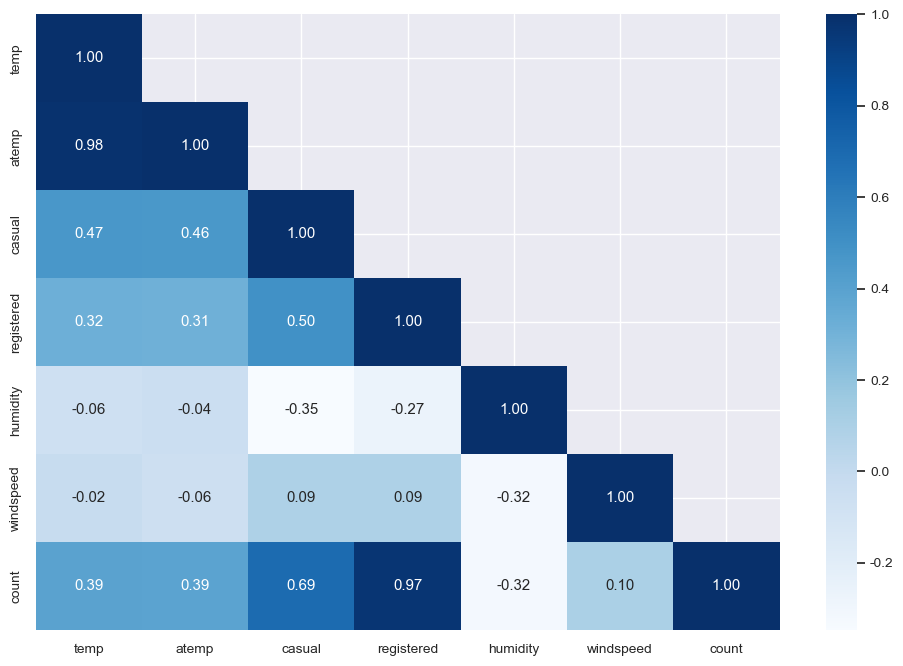

In [21]:
mask = np.array(corr_matrix_df)
mask[np.tril_indices_from(mask)] = False

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_df,
            cmap="Blues",
            annot=True,
            fmt=".2f",
            mask=mask)

<Axes: xlabel='humidity', ylabel='count'>

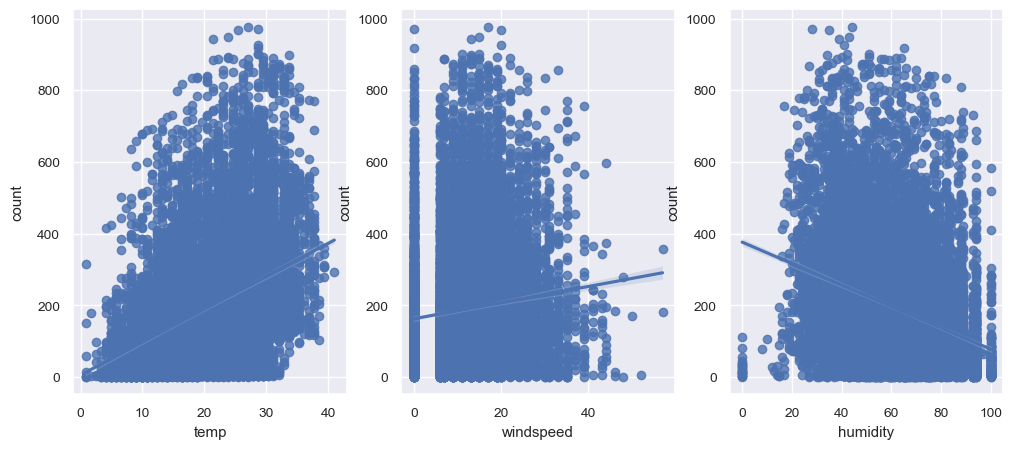

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)

sns.regplot(train, 
            x="temp", 
            y="count",
            ax=ax1)
sns.regplot(train, 
            x="windspeed", 
            y="count",
            ax=ax2)
sns.regplot(train,
            x="humidity",
            y="count",
            ax=ax3)

In [23]:
train["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [24]:
def concat_year_month(datetime):
    return f"{datetime.year}-{datetime.month}"

train["year month"] = train["datetime"].apply(concat_year_month)
train[["datetime", "year month"]].head()

,datetime,year month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1
